### 음성 데이터 전처리 및 합성 과정

지금부터 음성 데이터를 전처리하는 과정을 설명하겠습니다. 이 과정에서는 두 가지 음성 데이터를 사용할 것입니다. 이 데이터들은 모두 WAV 형식입니다. 두 가지 음성 데이터는 다음과 같습니다:

1. **Background Data**
2. **Event Data**

나중에 이 두 가지 데이터를 합성할 것이지만, 그 전에 각각의 데이터를 확인해보겠습니다. 데이터를 확인할 때는 다음을 수행해야 합니다:

- **Sample Rate 확인**: 각 데이터의 샘플링 레이트를 확인합니다.
- **IPython.display.Audio 활용**: 음성을 들어봅니다.

### 데이터 확인
먼저, 시간 축으로 WAV 형태의 데이터를 확인합니다. 먼저 Background Data를 확인한 후, Event Data를 확인합니다.

```python
import numpy as np
import matplotlib.pyplot as plt
import librosa
import IPython.display as ipd

# Background data 로드
background_data, sr_bg = librosa.load('path_to_background.wav', sr=None)
print(f'Background Sample Rate: {sr_bg}')
ipd.Audio(background_data, rate=sr_bg)

# Event data 로드
event_data, sr_event = librosa.load('path_to_event.wav', sr=None)
print(f'Event Sample Rate: {sr_event}')
ipd.Audio(event_data, rate=sr_event)

# 시간 축으로 데이터 시각화
plt.figure(figsize=(14, 5))
plt.plot(background_data)
plt.title('Background Data')
plt.show()

plt.figure(figsize=(14, 5))
plt.plot(event_data)
plt.title('Event Data')
plt.show()
```

### 데이터 합성
데이터를 합성하기 전에, 두 데이터의 길이를 맞춰줘야 합니다. 일반적으로 Event Data의 크기가 작기 때문에 Event Data의 시작 시점을 랜덤하게 설정한 후, 시간을 추가하여 Background Data의 길이와 맞춥니다. 여기서는 15초를 기준으로 데이터를 자릅니다.

```python
import random

# 기준 길이 설정 (15초)
target_length = 15 * sr_bg

# Event data의 시작 시점 랜덤 설정 및 길이 맞추기
start = random.randint(0, len(background_data) - target_length)
background_segment = background_data[start:start + target_length]

event_start = random.randint(0, target_length - len(event_data))
event_padded = np.pad(event_data, (event_start, target_length - event_start - len(event_data)), 'constant')

# 두 데이터 합성
combined_data = background_segment + event_padded

# 합성된 데이터 확인
ipd.Audio(combined_data, rate=sr_bg)

# 시각화
plt.figure(figsize=(14, 5))
plt.plot(combined_data)
plt.title('Combined Data')
plt.show()
```

이 과정을 통해 Background Data와 Event Data를 확인하고, 길이를 맞춘 후 합성하는 방법을 배웠습니다. 합성된 데이터는 IPython.display.Audio를 활용하여 확인할 수 있습니다.

### 멜 스펙트로그램 생성 및 시각화

이제 멜 스펙트로그램을 생성하고 시각화하는 과정을 진행하겠습니다. 이 과정에서는 기본적인 파라미터를 사용하여 멜 스펙트로그램을 생성합니다. 멜 스펙트로그램을 생성하는 이유는, 주파수와 시간축으로 변환된 데이터를 이미지 형태로 변환하여 딥러닝 모델에 사용할 수 있도록 하기 위함입니다.

#### 기본 파라미터 설정
- **FFT 컴포넌트 수**: Fast Fourier Transform에 사용할 컴포넌트 수
- **프레임 간 샘플 수**: 각 프레임 간의 샘플 수
- **멜 밴드 수**: 멜 밴드의 수

### 멜 스펙트로그램 생성 및 시각화 코드

```python
import librosa.display

# 기본 파라미터 설정
n_fft = 2048  # FFT 컴포넌트 수
hop_length = 512  # 프레임 간 샘플 수
n_mels = 128  # 멜 밴드 수

# 멜 스펙트로그램 계산
mel_spectrogram = librosa.feature.melspectrogram(combined_data, sr=sr_bg, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)

# dB 단위로 변환
mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

# 멜 스펙트로그램 시각화
plt.figure(figsize=(14, 5))
librosa.display.specshow(mel_spectrogram_db, sr=sr_bg, hop_length=hop_length, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-Spectrogram')
plt.show()
```

### 멜 스펙트로그램 이미지 변환의 이유
- **주파수와 시간축 정보 제공**: 음성 데이터를 주파수와 시간축으로 변환하여 시각적으로 확인할 수 있습니다.
- **딥러닝 모델 적용**: 멜 스펙트로그램을 이미지로 변환하여 딥러닝 모델에서 이미지 데이터를 학습하는 것처럼 사용할 수 있습니다.

### 다음 단계
이후 단계에서는 딥러닝 모델에 학습을 위해 적절한 크기의 이미지를 생성할 것입니다. 이를 위해 생성된 멜 스펙트로그램 이미지를 적절한 크기로 잘라내거나 리사이즈할 수 있습니다. 이를 통해 모델이 효과적으로 학습할 수 있는 데이터를 준비하게 됩니다.

```python
from skimage.transform import resize

# 멜 스펙트로그램 크기 조정
image_size = (128, 128)
resized_mel_spectrogram = resize(mel_spectrogram_db, image_size, mode='constant')

# 크기 조정된 멜 스펙트로그램 시각화
plt.figure(figsize=(5, 5))
plt.imshow(resized_mel_spectrogram, aspect='auto', origin='lower')
plt.colorbar(format='%+2.0f dB')
plt.title('Resized Mel-Spectrogram')
plt.show()
```

이렇게 하면, 멜 스펙트로그램을 생성하고 시각화하며, 이미지로 변환하여 딥러닝 모델 학습에 사용할 수 있게 됩니다.

In [ ]:
# 라이브러리 설치
! pip install librosa
! pip install IPython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.0 MB/s eta 0:00:00


# Background data

In [ ]:
# 음성 파일 불러오기
import librosa

file = "/content/drive/MyDrive/1DL_data_p/background/B_샤워소리.wav" # 15초 짜리
data, sample_rate = librosa.load(file, sr = 48000)

In [ ]:
len(data) / sample_rate

15.0

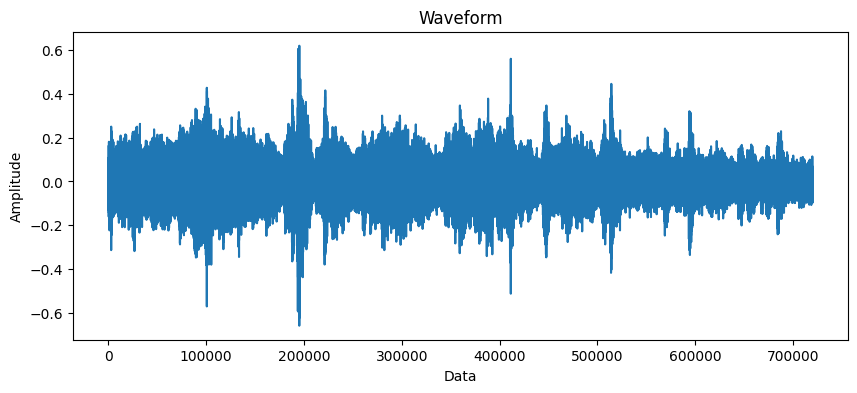

In [ ]:
# 음성 파일 시각화
import matplotlib.pyplot as plt
import IPython.display as ipd

plt.figure(figsize=(10, 4)) # 그림 크기를 정한다
plt.plot(data)

plt.xlabel('Data') # 음성 데이터
plt.ylabel('Amplitude') # 진폭
plt.title('Waveform')
plt.show()

ipd.Audio(data, rate = sample_rate)

# Event data

In [ ]:
new_file = "/content/drive/MyDrive/1DL_data_p/event/E_화재_15456_label.wav"
new_data, new_sample_rate = librosa.load(new_file, sr = 48000)

In [ ]:
len(new_data) / sample_rate

2.96

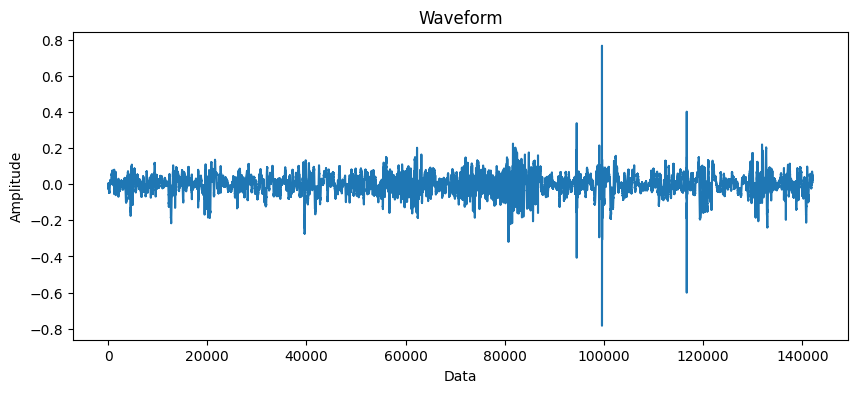

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(new_data) # 10초 단위
plt.xlabel('Data')
plt.ylabel('Amplitude')
plt.title('Waveform')
plt.show()

ipd.Audio(new_data, rate = new_sample_rate)

# 데이터 합성

In [ ]:
import random
start_point = random.randint(0,15 * 48000)
print(start_point)

352516


In [ ]:
# 351892개의 0을 위험상황 데이터 앞에다 더해줍니다.
import numpy as np
zero_list = np.zeros(start_point)
zero_long_list = np.zeros(15 * 48000)
emergency = np.concatenate((zero_list, np.array(new_data), np.array(zero_long_list)))

In [ ]:
# 그럼 여기 emegency는 초반에 아무 소리도 안 들리고 나중에 소리가 들리는 15초 이상의 데이터가 되겠죠
plt.figure(figsize=(10, 4))
plt.plot(emergency)
plt.xlabel('Data')
plt.ylabel('Amplitude')
plt.title('Waveform')
plt.show()

ipd.Audio(emergency, rate = sample_rate)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
len(emergency) / sample_rate

25.304083333333335

In [ ]:
emergency = emergency[:15*48000]
len(emergency) / sample_rate

15.0

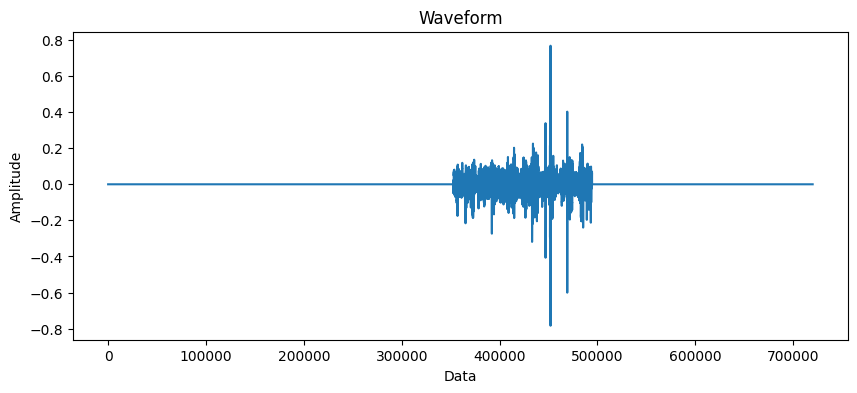

In [ ]:
# 우리가 원하는 건 15초 음성이니깐 이걸 잘라주면 되겠죠?
emergency = emergency[:15*48000]

plt.figure(figsize=(10, 4))
plt.plot(emergency)
plt.xlabel('Data')
plt.ylabel('Amplitude')
plt.title('Waveform')
plt.show()

ipd.Audio(emergency, rate = sample_rate)

In [ ]:
data_systehsis = 0.5 * data + 0.5 * emergency

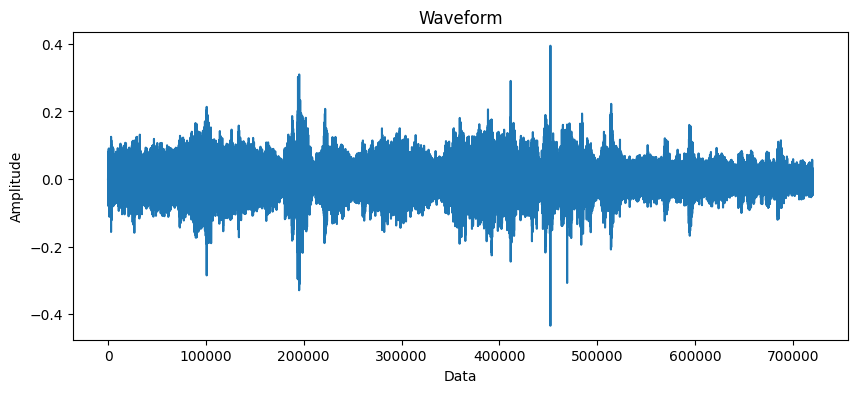

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(output)
plt.xlabel('Data')
plt.ylabel('Amplitude')
plt.title('Waveform')
plt.show()

ipd.Audio(data_systehsis, rate = sample_rate)

# 데이터 처리

In [ ]:
import numpy as np

# 멜 스펙트로그램 설정
n_fft = 2048       # FFT 컴포넌트의 수
hop_length = 512   # 연속적인 프레임 간 샘플 수
n_mels = 128       # 멜 밴드의 수

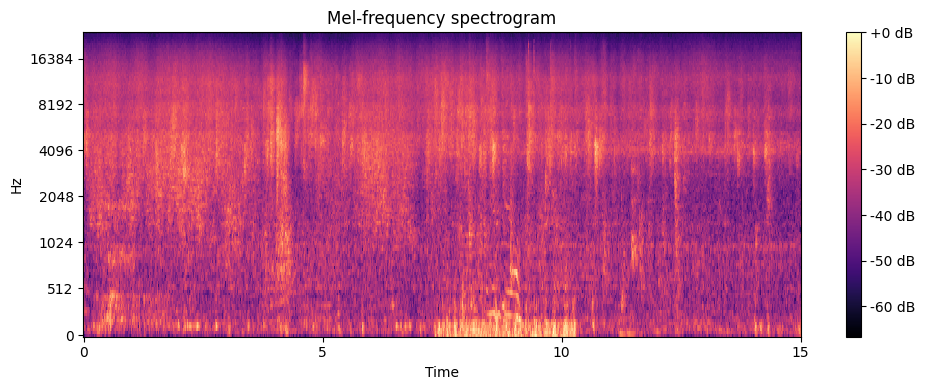

In [ ]:
# 멜 스펙트로그램 계산
S = librosa.feature.melspectrogram(y=data_systehsis, sr=new_sample_rate, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)

# 파워 스펙트로그램을 dB 단위로 변환 (시각화를 위해)
S_dB = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(10, 4))
librosa.display.specshow(S_dB, sr=sample_rate, hop_length=hop_length, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.show()

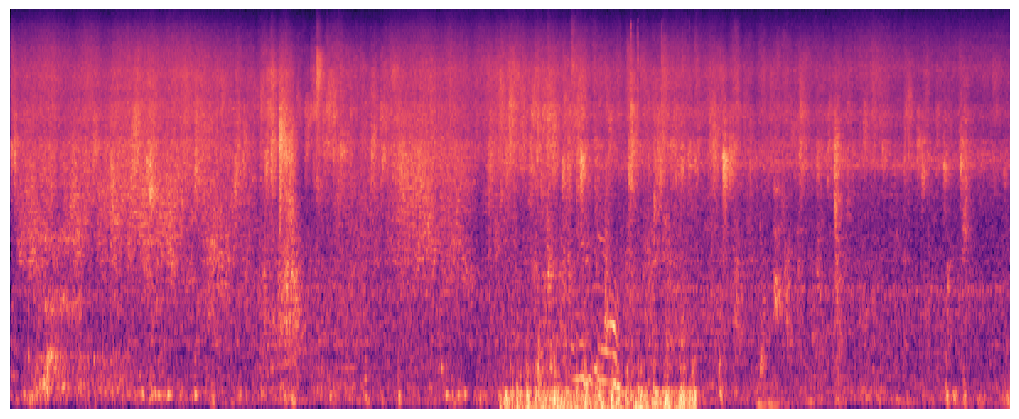

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.set_position([0, 0, 1, 1]) # (모서리위치, 가로 길이, 세로 길이)
ax.set_axis_off() # 객체 축 제거

librosa.display.specshow(S_dB, sr=sample_rate, hop_length=hop_length, x_axis='time', y_axis='mel',ax=ax)
                        # (db단위로변환멜스펙, 샘플링주파수, fft창연속된간격, x축시간, y축멜주파수, 이전에생성한axes에생성)
plt.savefig('/content/drive/MyDrive/1DL_data_p/p_round1/mel_spectrogram.png') # 데이터 파일로 저장

In [ ]:
from PIL import Image

# 이미지 파일 열기
image = Image.open('/content/drive/MyDrive/1DL_data_p/p_round1/mel_spectrogram.png')
image_array = np.array(image)

In [ ]:
image_array.shape

(400, 1000, 4)

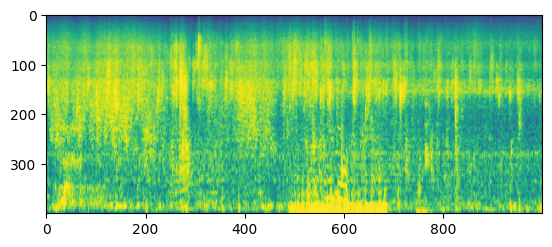

In [ ]:
plt.imshow(image_array[:,:,0])

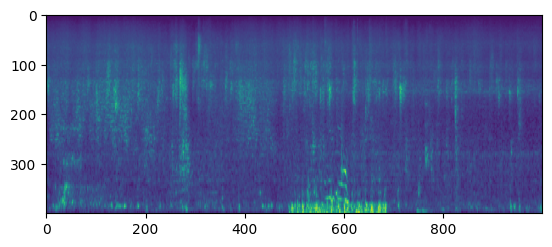

In [ ]:
plt.imshow(image_array[:,:,1])

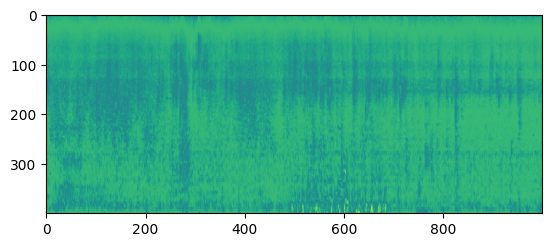

In [ ]:
plt.imshow(image_array[:,:,2])

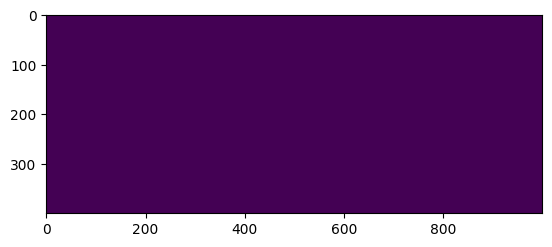

In [ ]:
plt.imshow(image_array[:,:,3])

In [ ]:
x_data = image_array[:,:,0:3]

In [ ]:
x_data.shape

(400, 1000, 3)

array([[[  0,   0,   4],
        [ 54,  16, 107],
        [ 49,  17, 101],
        ...,
        [ 52,  16, 105],
        [ 54,  16, 107],
        [ 34,  17,  80]],

       [[  0,   0,   4],
        [ 54,  16, 107],
        [ 49,  17, 101],
        ...,
        [ 52,  16, 105],
        [ 54,  16, 107],
        [ 34,  17,  80]],

       [[  0,   0,   4],
        [ 54,  16, 107],
        [ 49,  17, 101],
        ...,
        [ 52,  16, 105],
        [ 54,  16, 107],
        [ 34,  17,  80]],

       ...,

       [[ 68,  15, 118],
        [ 73,  16, 120],
        [118,  33, 129],
        ...,
        [232,  83,  98],
        [231,  82,  99],
        [243, 101,  92]],

       [[ 68,  15, 118],
        [ 73,  16, 120],
        [118,  33, 129],
        ...,
        [232,  83,  98],
        [231,  82,  99],
        [243, 101,  92]],

       [[ 68,  15, 118],
        [ 73,  16, 120],
        [118,  33, 129],
        ...,
        [232,  83,  98],
        [231,  82,  99],
        [243, 101,  92]]], dtype=uint8)
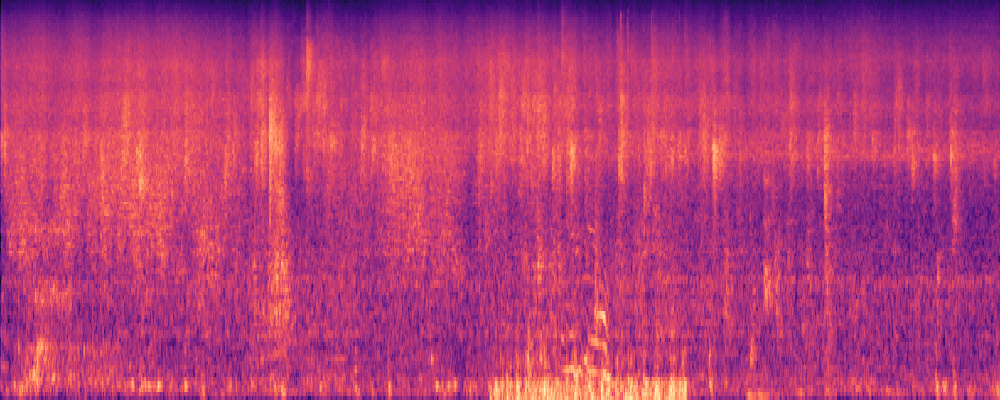

In [ ]:
x_data